## Best fit

Slope = 1.3523118693520293
Intercept = -0.912793289297742
The predicted Value of y for 30 is : 39.65656279126314


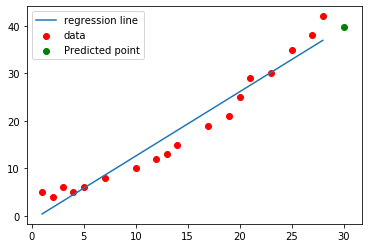

In [3]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

xs = np.array([1,2,3,4,5,7,10,12,13,14,17,19,20,21,23,25,27,28], dtype=np.float64)
ys = np.array([5,4,6,5,6,8,10,12,13,15,19,21,25,29,30,35,38,42], dtype=np.float64)


def best_fit_slope_and_intercept(xs, ys):
    m = (((mean(xs) * mean(ys)) - mean(xs * ys)) /
         ((mean(xs) * mean(xs)) - mean(xs * xs)))
    b = mean(ys) - m * mean(xs)
    return m, b

m, b = best_fit_slope_and_intercept(xs, ys)
print("Slope = {}\nIntercept = {}".format(m, b))
regression_line = [(m*x)+b for x in xs]

predict_x = 30
predict_y = (m*predict_x)+b
print("The predicted Value of y for 30 is : {}".format(predict_y))
plt.scatter(xs,ys,color='r',label='data')
plt.plot(xs, regression_line, label='regression line')
plt.scatter(predict_x, predict_y, color='g', label="Predicted point")
plt.legend()
plt.show()

## Simple python code 

In [7]:
x = [4,8,-6,9,7,12,-10,0.5,11,17,0.5,-4,-11,-12,3.4]

In [10]:
def time_pass(n):
    total_sum = 0
    max = 0
    min = 0
    for i in x:
        total_sum += i
        if max < i:
            max = i
        elif min > i:
            min = i
    average = total_sum/len(n)
    
    print("The total sum is {} with the maximum value of {} and the minimum value of {} and the average of the list {}: ".format(total_sum, max, min, average))
            

In [11]:
time_pass(x)

The total sum is 29.4 with the maximum value of 17 and the minimum value of -12 and the average of the list 1.96: 


# Principal Component Analysis in python

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns

In [28]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1,len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
    return summary

In [29]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

In [30]:
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [31]:
def pca_scatter(pca, standardised_values, classifs, main):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)
    plt.title(main)
    plt.show()
    return bar

### Dataframe created

In [32]:
data = pd.read_csv("iris.csv")
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names to be similar to R naming convention
print(data)

      V1   V2   V3   V4   V5              V6
0      1  5.1  3.5  1.4  0.2     Iris-setosa
1      2  4.9  3.0  1.4  0.2     Iris-setosa
2      3  4.7  3.2  1.3  0.2     Iris-setosa
3      4  4.6  3.1  1.5  0.2     Iris-setosa
4      5  5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...  ...             ...
145  146  6.7  3.0  5.2  2.3  Iris-virginica
146  147  6.3  2.5  5.0  1.9  Iris-virginica
147  148  6.5  3.0  5.2  2.0  Iris-virginica
148  149  6.2  3.4  5.4  2.3  Iris-virginica
149  150  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 6 columns]


### Key values in dataset

In [33]:
data.keys()

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6'], dtype='object')

### Head values

In [34]:
data.head()

,V1,V2,V3,V4,V5,V6
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
X = data.loc[:,"V2":"V5"] # independent variables data
y = data.V6 # dependent variable data
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)
pca = PCA().fit(standardisedX)
summary = pca_summary(pca, standardisedX,False)
print(summary)

                  sdev                varprop               cumprop
    Standard deviation Proportion of Variance Cumulative Proportion
PC1           1.706112               0.727705              0.727705
PC2           0.959803               0.230305              0.958010
PC3           0.383866               0.036838              0.994848
PC4           0.143554               0.005152              1.000000


## Deciding How Many Principal Components to Retain

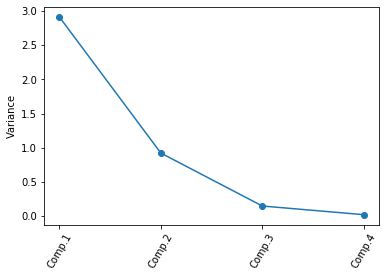

     Standard deviation
PC1            2.910818
PC2            0.921221
PC3            0.147353
PC4            0.020608
     Cumulative Proportion
PC1               0.727705
PC2               0.958010
PC3               0.994848
PC4               1.000000


In [36]:
screeplot(pca, standardisedX)
print(summary.sdev**2)
print(summary.cumprop)

## Loadings for the Principal Components

In [37]:
print(pca.components_[0])
print(pca.components_[1])

[ 0.52237162 -0.26335492  0.58125401  0.56561105]
[0.37231836 0.92555649 0.02109478 0.06541577]


### All principal components

In [38]:
print(pca.components_)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


In [39]:
print(calcpc(standardisedX, pca.components_[0]))

[-2.26454173 -2.0864255  -2.36795045 -2.30419716 -2.38877749 -2.07053681
 -2.44571134 -2.23384186 -2.34195768 -2.18867576 -2.16348656 -2.32737775
 -2.22408272 -2.63971626 -2.19229151 -2.25146521 -2.20275048 -2.19017916
 -1.89407429 -2.33994907 -1.91455639 -2.2046454  -2.77416979 -1.82041156
 -2.2282175  -1.95702401 -2.05206331 -2.16819365 -2.14030596 -2.26879019
 -2.14455443 -1.8319381  -2.60820287 -2.43795086 -2.18867576 -2.2111199
 -2.04441652 -2.18867576 -2.4359522  -2.1705472  -2.28652724 -1.87170722
 -2.55783442 -1.96427929 -2.13337283 -2.07535759 -2.38125822 -2.39819169
 -2.22678121 -2.20595417  1.10399365  0.73248144  1.24210951  0.39730728
  1.07259395  0.38445815  0.74871508 -0.49786339  0.92622237  0.00496803
 -0.12469746  0.43873012  0.55163398  0.71716507 -0.03725838  0.87589054
  0.3480064   0.15339254  1.21530321  0.15694118  0.7382561   0.47236968
  1.22798821  0.62938105  0.7004728   0.87353699  1.25422219  1.35823985
  0.66212614 -0.04728151  0.12153421  0.01411823  0.

In [40]:
print(calcpc(standardisedX, pca.components_[1]))

[ 5.05703903e-01 -6.55404729e-01 -3.18477311e-01 -5.75367713e-01
  6.74767397e-01  1.51854856e+00  7.45626750e-02  2.47613932e-01
 -1.09514636e+00 -4.48629048e-01  1.07059558e+00  1.58587455e-01
 -7.09118158e-01 -9.38281982e-01  1.88997851e+00  2.72237108e+00
  1.51375028e+00  5.14304308e-01  1.43111071e+00  1.15803343e+00
  4.30465163e-01  9.52457317e-01  4.89517027e-01  1.06750793e-01
  1.62186163e-01 -6.07892567e-01  2.66014312e-01  5.52016495e-01
  3.36640409e-01 -3.14878603e-01 -4.83942097e-01  4.45266836e-01
  1.82847519e+00  2.18539162e+00 -4.48629048e-01 -1.84337811e-01
  6.84956426e-01 -4.48629048e-01 -8.82169415e-01  2.92726955e-01
  4.67991716e-01 -2.32769161e+00 -4.53816380e-01  4.97391640e-01
  1.17143211e+00 -6.91917347e-01  1.15063259e+00 -3.62390765e-01
  1.02548255e+00  3.22378453e-02  8.63112446e-01  5.98635573e-01
  6.14822450e-01 -1.75816895e+00 -2.11757903e-01 -5.91062469e-01
  7.78698611e-01 -1.84886877e+00  3.03308268e-02 -1.02940111e+00
 -2.65806268e+00 -5.88812

### Scatter plot of PCA components

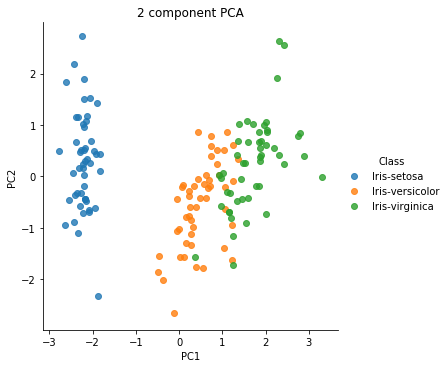

In [41]:
PCA = pca_scatter(pca, standardisedX, y,"2 component PCA")

In [42]:
print(data.shape)
print(PCA.shape)

(150, 6)
(150, 3)


### Heatmap of PCA components

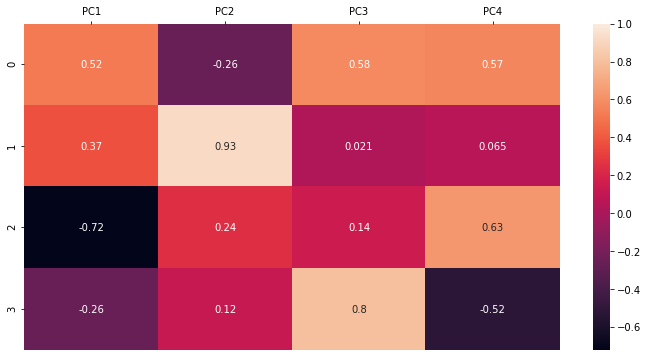

In [43]:
pca_df= pd.DataFrame(pca.components_,columns=["PC"+str(i) for i in range(1,len(pca.components_)+1)])
plt.figure(figsize=(12,6))
sns.heatmap(pca_df, vmax=1., square=False, annot = True).xaxis.tick_top()